# 📂 Step 1 – Uploading the Dataset
Importing the dataset file from the local system into Google Colab so it can be used for analysis and model training.


In [1]:
from google.colab import files
uploaded = files.upload()



Saving Plant_1_Generation_Data.csv.zip to Plant_1_Generation_Data.csv.zip


In [2]:
import os
os.listdir()

['.config', 'Plant_1_Generation_Data.csv.zip', 'sample_data']

# 📦 Step 2 – Extracting the ZIP File
Unzipping the downloaded dataset to access the main CSV file for analysis.


In [4]:
import zipfile
with zipfile.ZipFile("Plant_1_Generation_Data.csv.zip", 'r') as zip_ref:
    zip_ref.extractall()


# 🌞 Step 3 – Loading and Previewing the Dataset
Reading the extracted CSV file using pandas and displaying the first few rows to understand the data format and columns.


In [5]:

import pandas as pd
df = pd.read_csv("Plant_1_Generation_Data.csv")
df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


# ⚙️ Step 4 – Data Preprocessing and Feature Selection
Converting the date-time column into proper format, extracting the hour feature,  
and selecting key inputs (DC Power, Daily Yield, Hour) to predict the AC Power output.


In [6]:
import pandas as pd

# Convert date column to proper datetime
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], format='%d-%m-%Y %H:%M')

# Extract hour (helps model learn time pattern)
df['HOUR'] = df['DATE_TIME'].dt.hour

# Define input features (X) and target (y)
X = df[['DC_POWER', 'DAILY_YIELD', 'HOUR']]
y = df['AC_POWER']

print("Data ready ✅")
df.head()

Data ready ✅


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,HOUR
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,0


# ✂️ Step 5 – Spliting the Dataset
Splitting the data into 80% for training and 20% for testing,  
so the model can learn patterns on one part and be tested on unseen data.


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

Training samples: 55022
Testing samples: 13756


# 🧠 Step 6 – Training the Linear Regression Model
Training a simple Linear Regression model to learn how DC Power, Daily Yield,  
and Hour influence the AC Power output of the solar plant.


In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Model training complete ✅")


Model training complete ✅


# 🔮 Step 7 – Making Predictions
Using the trained model to predict AC Power values on the test data  
and displaying a few sample predictions.


In [9]:
y_pred = model.predict(X_test)

print("Sample predictions:", y_pred[:5])

Sample predictions: [2.60046975e-01 2.49966040e-01 7.16805229e+02 2.80063044e-01
 7.49271776e+02]


# 📈 Step 8 – Visualizing Actual vs Predicted Results
Plotting a scatter graph to compare actual AC Power values with the model’s predicted values.  
Points closer to the diagonal line show higher prediction accuracy.


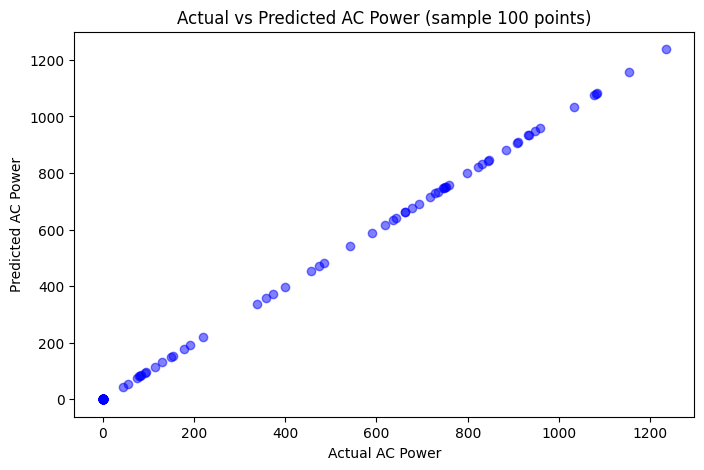

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test[:100], y_pred[:100], color='blue', alpha=0.5)
plt.xlabel("Actual AC Power")
plt.ylabel("Predicted AC Power")
plt.title("Actual vs Predicted AC Power (sample 100 points)")
plt.show()


# 📊 Step 9 – Evaluating Model Accuracy
Checking how well the model performed using R² Score and Mean Absolute Error (MAE).  
Higher R² and lower MAE mean better prediction accuracy.


In [11]:
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("✅ Model Accuracy (R² Score):", round(r2, 3))
print("📉 Mean Absolute Error:", round(mae, 3))


✅ Model Accuracy (R² Score): 1.0
📉 Mean Absolute Error: 0.715


# 🌲 Step 10 – Training and Testing Random Forest Model
Using a Random Forest Regressor to improve prediction accuracy.  
This model handles complex data patterns better and usually gives more accurate results than Linear Regression.


In [12]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest R²:", round(r2_score(y_test, rf_pred), 3))
print("MAE:", round(mean_absolute_error(y_test, rf_pred), 3))


Random Forest R²: 1.0
MAE: 0.145
